<a href="https://colab.research.google.com/github/micahming/lus-preds/blob/main/ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 6.7 MB/s eta 0:00:00


In [ ]:

import pandas as pd
import traceback
from glob import glob
from datetime import datetime
import openpyxl
import matplotlib.pyplot as plt
import plotly.express as px
import pytz
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.stattools import adfuller
from pmdarima import auto_arima
from math import sqrt
import warnings
warnings.filterwarnings('ignore')




In [ ]:
def wrangle(filepath):

    df =pd.read_excel(filepath)
    #Create timestamp
    file_name = f" {filepath} "
    file_name = file_name.replace(".xlsx.xls","").replace("/content/LUSE_STOCK/","").replace(" ","")
    formalt= '%Y-%m-%d'
    timestamp = datetime.strptime(file_name,formalt)


    #Adding Column Names
    column_row_1 = list(df.iloc[8])
    column_row_2=[str(item) for item in (list(df.iloc[9]))]
    column_row_3=[str(item) for item in (list(df.iloc[10]))]

    column_names=[]
    count = 0
    for name in column_row_1:
        freshname=column_row_1[count] + column_row_2[count]+ column_row_3[count]
        new = freshname.replace("nan","",2)
        column_names.append(new)
        count=count+1

    df.columns = column_names




    #Create StringCheck

    string_check = ['AELZ', 'ATEL', 'BATA', 'BATZ', 'CCHZ', 'CECZ', 'FARM', 'FQMZ',
           'INVE', 'LAFA', 'MAFS', 'NATB', 'PMDZ', 'PRIM', 'PUMA', 'REIZ',
           'SCBL', 'SHOP', 'ZABR', 'ZCCM', 'ZMBF', 'ZMFA', 'ZNCO', 'ZSUG']

    pattern = '|'.join(string_check)
    #Apply mask to only show companies
    cleaner=df['Instrument'].str.contains(pattern).fillna(False)
    df = df[cleaner]
    #Fill NaN Values
    df=df.fillna(0)

    #Filter for select companies
    select_companies = ['CECZ','ATEL','REIZ','SCBL','SHOP']
    string_check2 = "|".join(select_companies)
    df=df[df['Instrument'].str.contains(string_check2)]

    #Add DataFrame Date
    df['timestamp'] = [timestamp] * 5

   #Drop Columns
    # df= df.drop(columns=[ 'Bid Qty', 'BidPrice', 'AskPrice', 'Ask Qty',
    #    'LastTradePrice', 'NetChange', 'TotalTurnover',
    #    'AveragePrice', 'LastTradedSize', '52 WeekHigh', '52 WeekLow',
    #    'OpeningPrice', 'Change%', 'PrevClosingPrice', 'TotalTrades',
    #    'TotalVolume', 'ForeignSells'], inplace =True)



    return df

In [ ]:
files = sorted(glob("/content/LUSE_STOCK/*-*-*.xlsx.xls"))


In [ ]:
frames = [wrangle(file) for file in files]



In [ ]:
atel_frames=[(frame[frame['Instrument']=='ATEL']) for frame in frames]
cecz_frames=[(frame[frame['Instrument']=='CECZ']) for frame in frames]
reiz_frames=[(frame[frame['Instrument']=='REIZ']) for frame in frames]
scbl_frames=[(frame[frame['Instrument']=='SCBL']) for frame in frames]
shop_frames=[(frame[frame['Instrument']=='SHOP']) for frame in frames]

In [ ]:
final_atel_frame= pd.concat(atel_frames).fillna(0)
final_cecz_frame= pd.concat(cecz_frames).fillna(0)
final_reiz_frame= pd.concat(reiz_frames).fillna(0)
final_scbl_frame= pd.concat(scbl_frames).fillna(0)
final_shop_frame= pd.concat(shop_frames).fillna(0)

In [ ]:
final_atel_frame=final_atel_frame.drop(columns=['Bid Qty', 'BidPrice', 'AskPrice', 'Ask Qty',
       'LastTradePrice', 'NetChange','TotalTurnover',
       'AveragePrice', 'LastTradedSize', '52 WeekHigh', '52 WeekLow',
       'OpeningPrice', 'Change%', 'PrevClosingPrice', 'TotalTrades',
       'TotalVolume', 'ForeignBuys', 'ForeignSells','ForeignBuy'])
final_cecz_frame=final_cecz_frame.drop(columns=['Bid Qty', 'BidPrice', 'AskPrice', 'Ask Qty',
       'LastTradePrice', 'NetChange','TotalTurnover',
       'AveragePrice', 'LastTradedSize', '52 WeekHigh', '52 WeekLow',
       'OpeningPrice', 'Change%', 'PrevClosingPrice', 'TotalTrades',
       'TotalVolume', 'ForeignBuys', 'ForeignSells','ForeignBuy'])
final_reiz_frame=final_reiz_frame.drop(columns=['Bid Qty', 'BidPrice', 'AskPrice', 'Ask Qty',
       'LastTradePrice', 'NetChange','TotalTurnover',
       'AveragePrice', 'LastTradedSize', '52 WeekHigh', '52 WeekLow',
       'OpeningPrice', 'Change%', 'PrevClosingPrice', 'TotalTrades',
       'TotalVolume', 'ForeignBuys', 'ForeignSells','ForeignBuy'])
final_scbl_frame=final_scbl_frame.drop(columns=['Bid Qty', 'BidPrice', 'AskPrice', 'Ask Qty',
       'LastTradePrice', 'NetChange','TotalTurnover',
       'AveragePrice', 'LastTradedSize', '52 WeekHigh', '52 WeekLow',
       'OpeningPrice', 'Change%', 'PrevClosingPrice', 'TotalTrades',
       'TotalVolume', 'ForeignBuys', 'ForeignSells','ForeignBuy'])
final_shop_frame=final_shop_frame.drop(columns=['Bid Qty', 'BidPrice', 'AskPrice', 'Ask Qty',
       'LastTradePrice', 'NetChange','TotalTurnover',
       'AveragePrice', 'LastTradedSize', '52 WeekHigh', '52 WeekLow',
       'OpeningPrice', 'Change%', 'PrevClosingPrice', 'TotalTrades',
       'TotalVolume', 'ForeignBuys', 'ForeignSells','ForeignBuy'])

In [ ]:
atel_time_series=final_atel_frame.set_index('timestamp').drop(columns='Instrument')
cecz_time_series=final_cecz_frame.set_index('timestamp').drop(columns='Instrument')
reiz_time_series=final_reiz_frame.set_index('timestamp').drop(columns='Instrument')
scbl_time_series=final_scbl_frame.set_index('timestamp').drop(columns='Instrument')
shop_time_series=final_shop_frame.set_index('timestamp').drop(columns='Instrument')

In [ ]:
frames[0]

,Instrument,Bid Qty,BidPrice,AskPrice,Ask Qty,LastTradePrice,NetChange,ClosingPrice,TotalTurnover,AveragePrice,...,52 WeekHigh,52 WeekLow,OpeningPrice,Change%,PrevClosingPrice,TotalTrades,TotalVolume,ForeignBuys,ForeignSells,timestamp
12,ATEL,0,0.0,0.00,0,0.00,0,31.48,0.00,0.0000,...,35.00,31.48,31.48,0,31.48,0,0,0,0,2020-01-02
16,CECZ,0,0.0,1.24,16500,1.24,0,1.25,7572.91,1.2467,...,2.10,1.00,1.25,0,1.25,30,6066,0,0,2020-01-02
26,REIZ,0,0.0,4.49,35800,0.00,0,4.49,0.00,0.0000,...,5.99,4.49,4.49,0,4.49,0,0,0,0,2020-01-02
27,SCBL,0,0.0,1.63,13500,1.63,0,1.63,1305.63,1.6300,...,2.62,1.63,1.63,0,1.63,3,801,0,0,2020-01-02
28,SHOP,0,0.0,63.00,100,0.00,0,63.00,0.00,0.0000,...,0.00,0.00,63.00,0,63.00,0,0,0,0,2020-01-02


In [ ]:
final_atel_frame

,Instrument,ClosingPrice,timestamp
12,ATEL,31.48,2020-01-02
12,ATEL,31.48,2020-01-03
12,ATEL,31.48,2020-01-06
12,ATEL,31.48,2020-01-07
12,ATEL,31.48,2020-01-08
...,...,...,...
12,ATEL,43.50,2024-02-08
12,ATEL,43.50,2024-02-09
12,ATEL,43.50,2024-02-12
12,ATEL,43.50,2024-02-13


In [ ]:
final_cecz_frame

,Instrument,ClosingPrice,timestamp
16,CECZ,1.25,2020-01-02
16,CECZ,1.25,2020-01-03
16,CECZ,1.25,2020-01-06
16,CECZ,1.24,2020-01-07
16,CECZ,1.24,2020-01-08
...,...,...,...
16,CECZ,7.51,2024-02-08
16,CECZ,7.51,2024-02-09
16,CECZ,7.51,2024-02-12
16,CECZ,7.65,2024-02-13


In [ ]:
final_reiz_frame

,Instrument,ClosingPrice,timestamp
26,REIZ,4.49,2020-01-02
26,REIZ,4.49,2020-01-03
26,REIZ,4.49,2020-01-06
26,REIZ,4.49,2020-01-07
26,REIZ,4.49,2020-01-08
...,...,...,...
27,REIZ,1.35,2024-02-08
27,REIZ,1.35,2024-02-09
27,REIZ,1.35,2024-02-12
27,REIZ,1.35,2024-02-13


In [ ]:
final_scbl_frame

,Instrument,ClosingPrice,timestamp
27,SCBL,1.63,2020-01-02
27,SCBL,1.63,2020-01-03
27,SCBL,1.63,2020-01-06
27,SCBL,1.63,2020-01-07
27,SCBL,1.63,2020-01-08
...,...,...,...
28,SCBL,1.75,2024-02-08
28,SCBL,1.75,2024-02-09
28,SCBL,1.70,2024-02-12
28,SCBL,1.75,2024-02-13


In [ ]:
final_shop_frame

,Instrument,ClosingPrice,timestamp
28,SHOP,63.0,2020-01-02
28,SHOP,63.0,2020-01-03
28,SHOP,63.0,2020-01-06
28,SHOP,63.0,2020-01-07
28,SHOP,63.0,2020-01-08
...,...,...,...
29,SHOP,64.0,2024-02-08
29,SHOP,64.0,2024-02-09
29,SHOP,64.0,2024-02-12
29,SHOP,64.0,2024-02-13


ATEL PLOTS

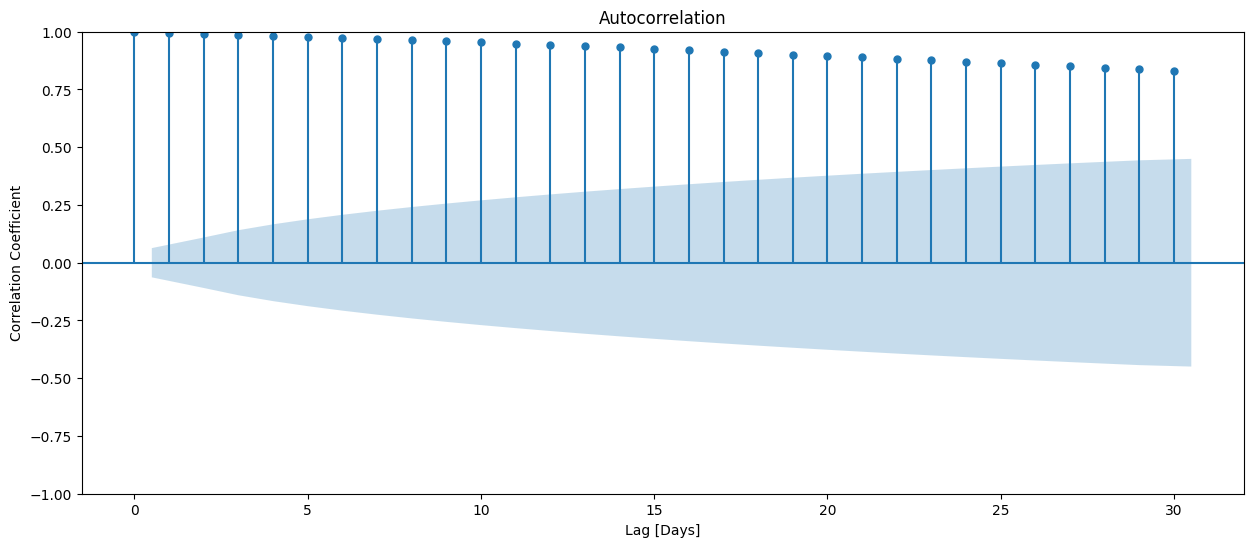

In [ ]:
fig, ax = plt.subplots(figsize=(15, 6))
plot_acf(atel_time_series,ax=ax)
plt.xlabel("Lag [Days]")
plt.ylabel("Correlation Coefficient");

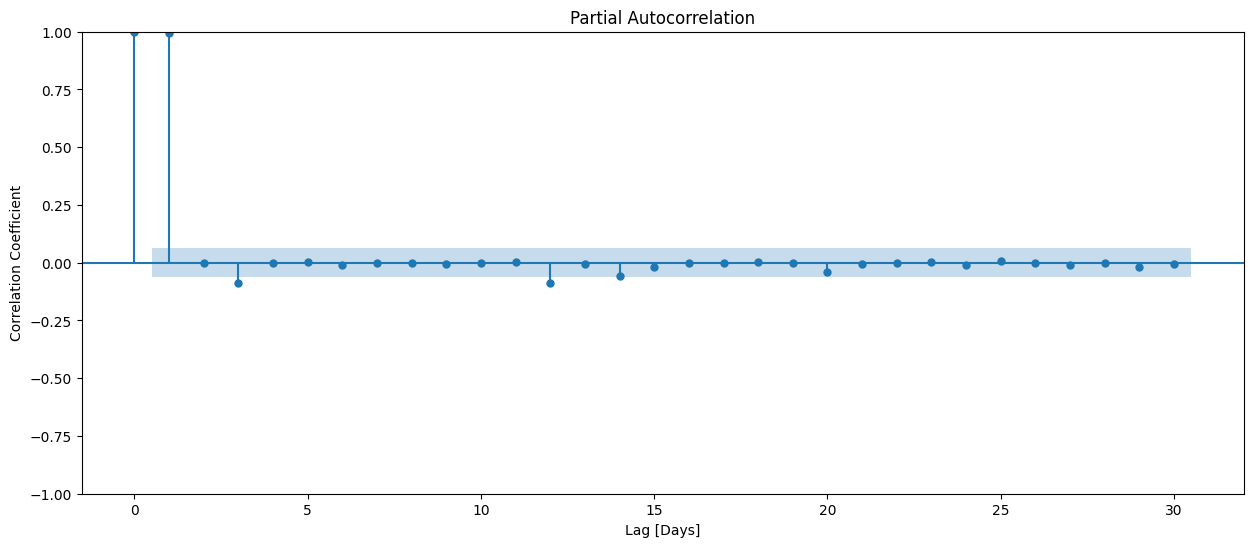

In [ ]:
fig, ax = plt.subplots(figsize=(15, 6))
plot_pacf(atel_time_series,ax=ax)
plt.xlabel("Lag [Days]")
plt.ylabel("Correlation Coefficient");

<Axes: title={'center': 'ATEL Closing Price Times Series'}, xlabel='Time', ylabel='Closing Price'>

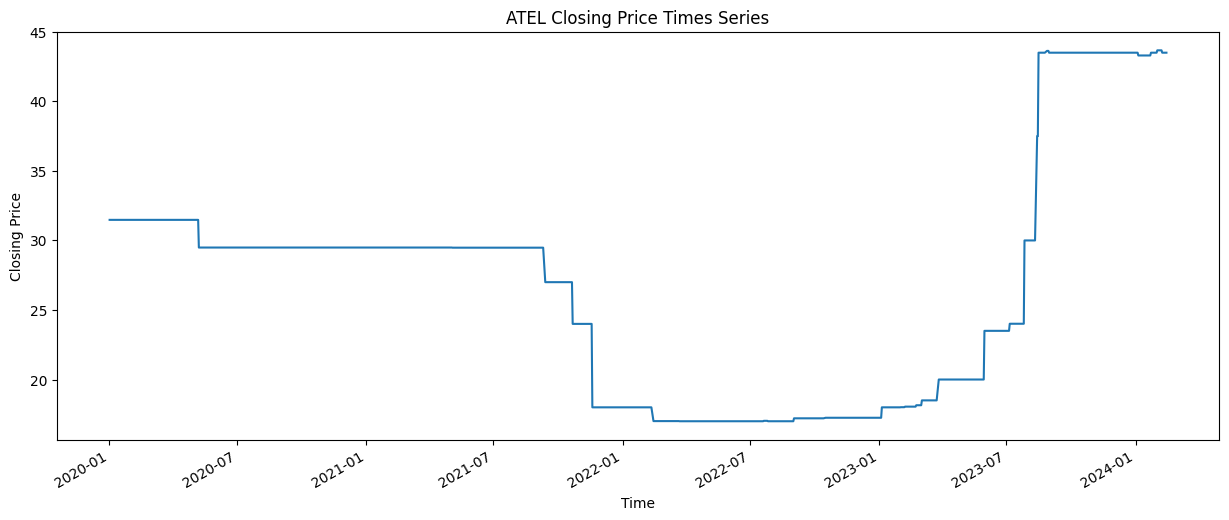

In [ ]:
fig, ax = plt.subplots(figsize=(15, 6))
atel_time_series["ClosingPrice"].plot(xlabel="Time",ylabel="Closing Price",title="ATEL Closing Price Times Series",ax=ax)

<Axes: title={'center': 'ATEL Rolling Monthly Closing Price Times Series'}, xlabel='Time', ylabel='Closing Price'>

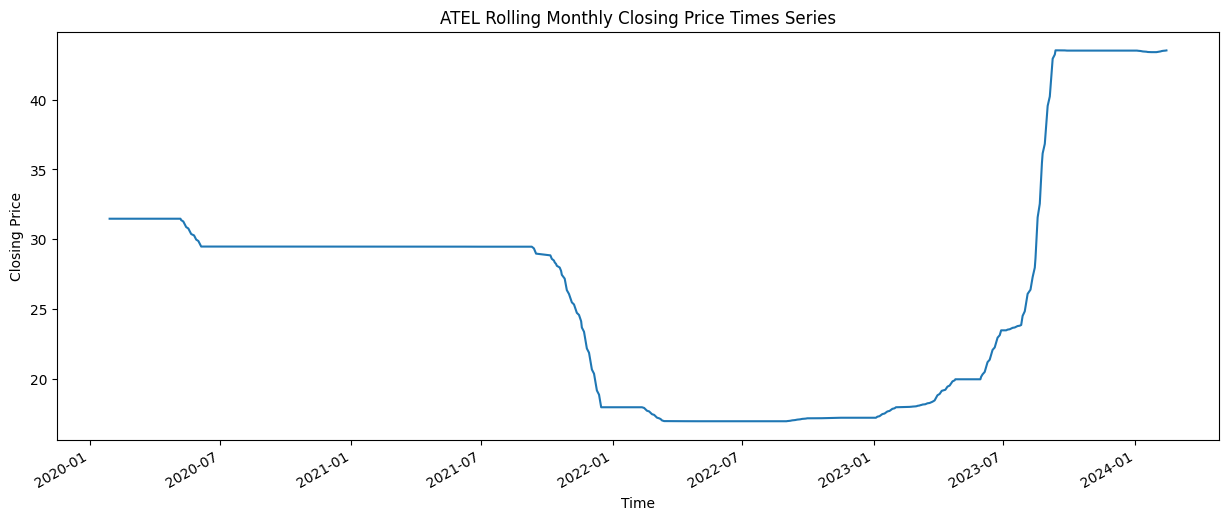

In [ ]:
fig, ax = plt.subplots(figsize=(15, 6))
atel_time_series["ClosingPrice"].rolling(20).mean().plot(xlabel="Time",ylabel="Closing Price",title="ATEL Rolling Monthly Closing Price Times Series",ax=ax)

CECZ PLOTS

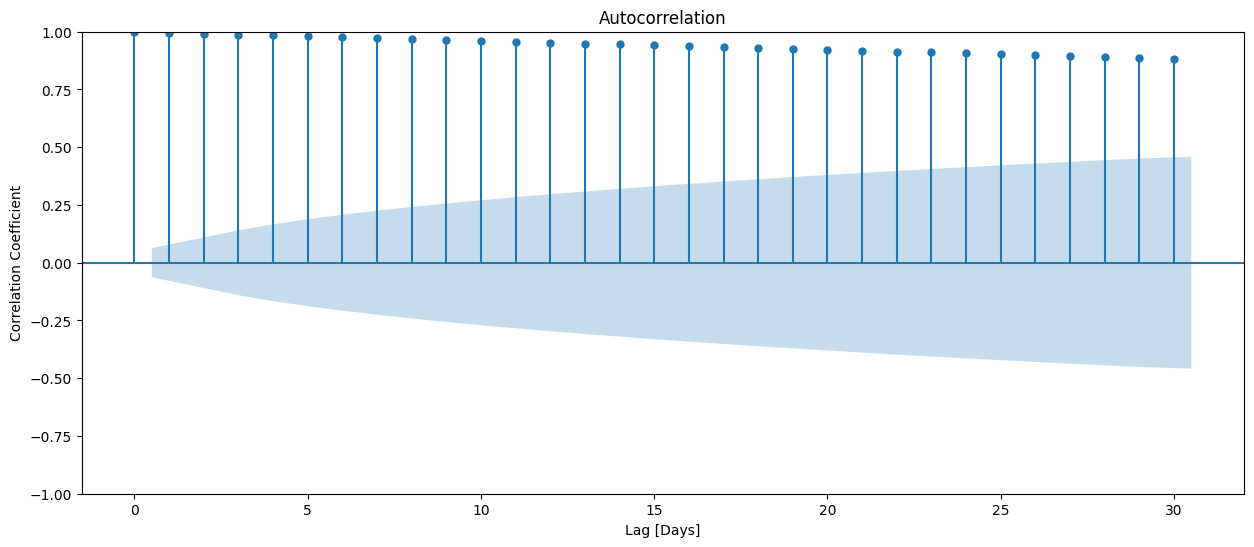

In [ ]:
fig, ax = plt.subplots(figsize=(15, 6))
plot_acf(cecz_time_series,ax=ax)
plt.xlabel("Lag [Days]")
plt.ylabel("Correlation Coefficient");

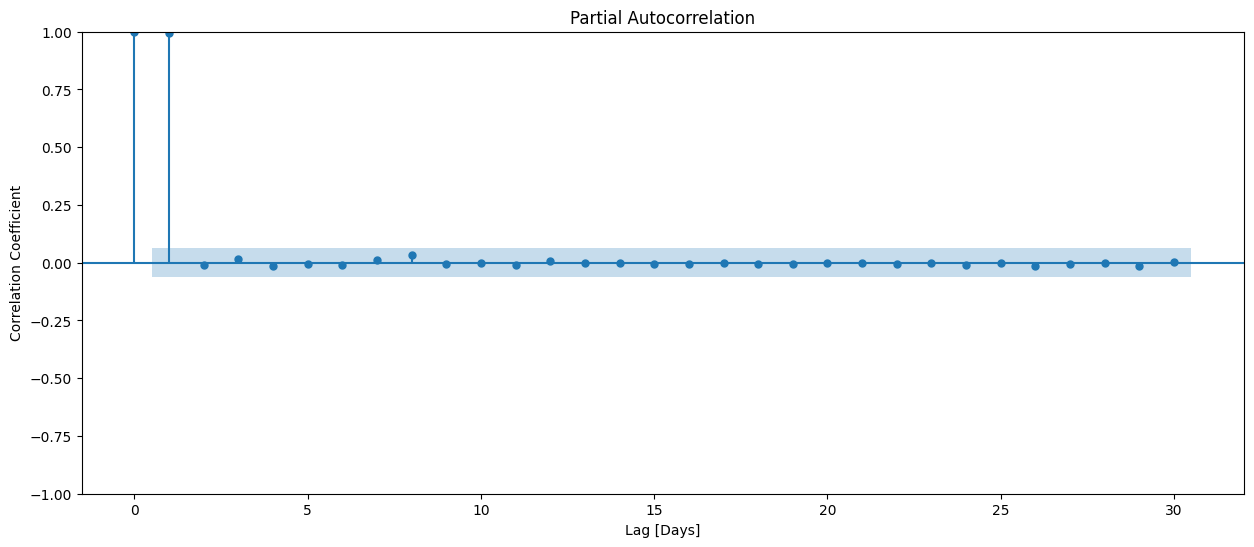

In [ ]:
fig, ax = plt.subplots(figsize=(15, 6))
plot_pacf(cecz_time_series,ax=ax)
plt.xlabel("Lag [Days]")
plt.ylabel("Correlation Coefficient");

<Axes: title={'center': 'CECZ Closing Price Times Series'}, xlabel='Time', ylabel='Closing Price'>

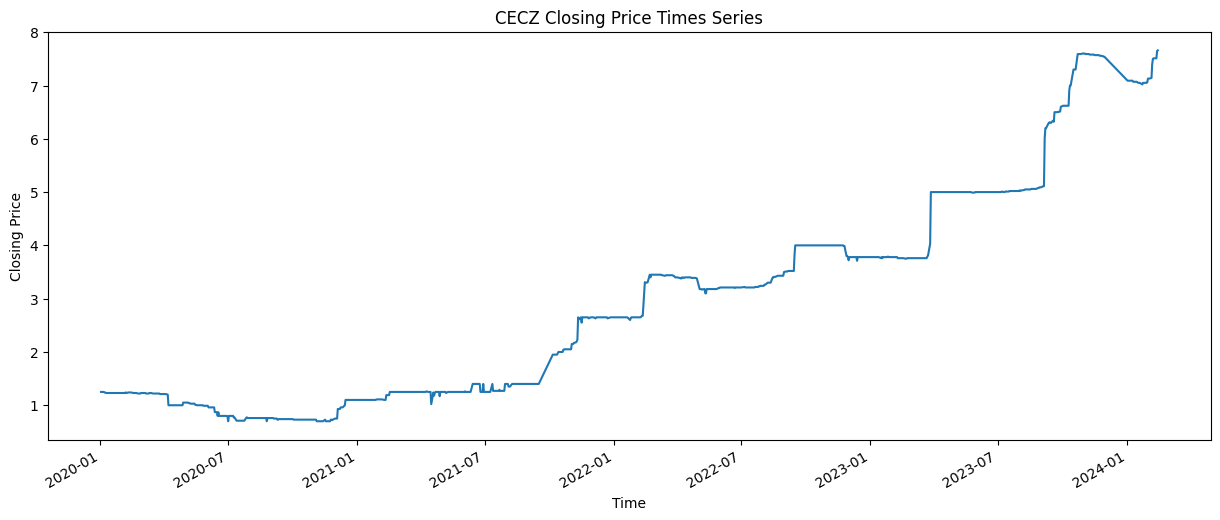

In [ ]:
fig, ax = plt.subplots(figsize=(15, 6))
cecz_time_series["ClosingPrice"].plot(xlabel="Time",ylabel="Closing Price",title="CECZ Closing Price Times Series",ax=ax)

<Axes: title={'center': 'CECZ Rolling Monthly Closing Price Times Series'}, xlabel='Time', ylabel='Closing Price'>

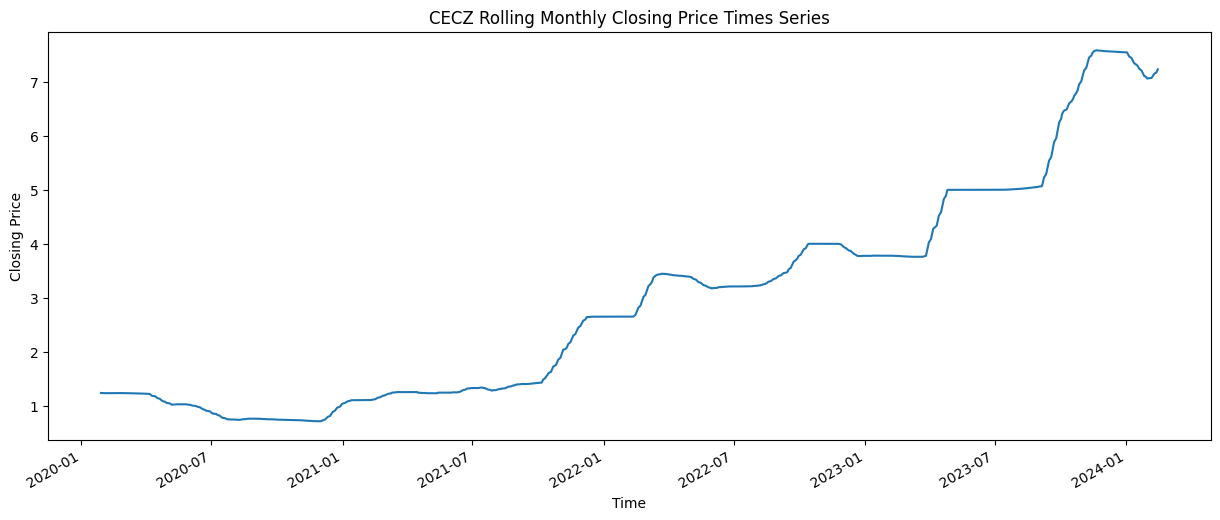

In [ ]:
fig, ax = plt.subplots(figsize=(15, 6))
cecz_time_series["ClosingPrice"].rolling(20).mean().plot(xlabel="Time",ylabel="Closing Price",title="CECZ Rolling Monthly Closing Price Times Series",ax=ax)

REIZ PLOTS

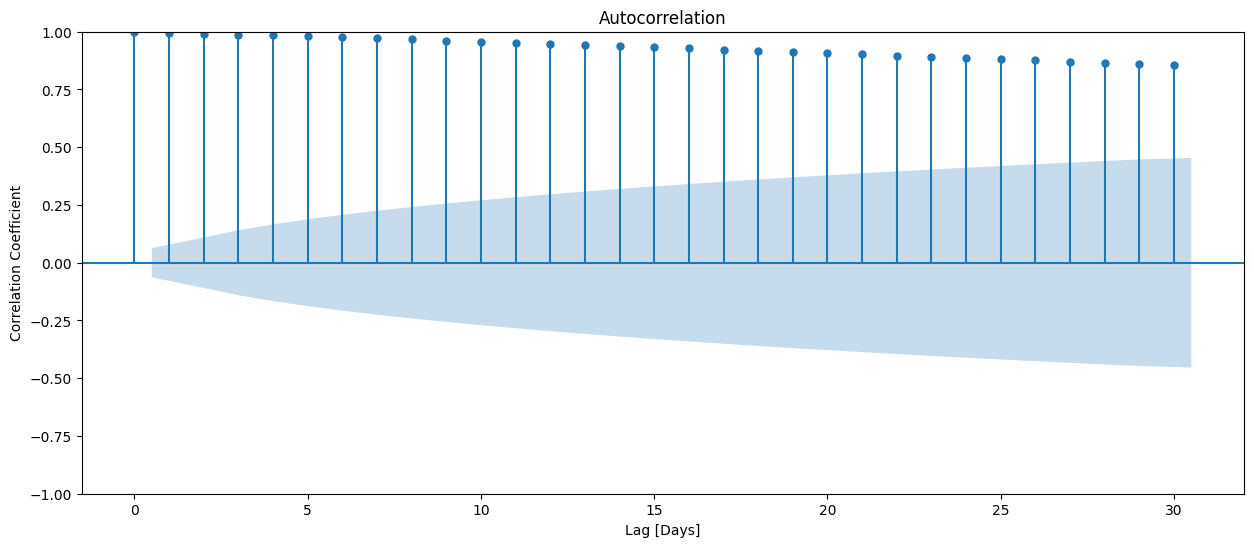

In [ ]:
fig, ax = plt.subplots(figsize=(15, 6))
plot_acf(reiz_time_series,ax=ax)
plt.xlabel("Lag [Days]")
plt.ylabel("Correlation Coefficient");

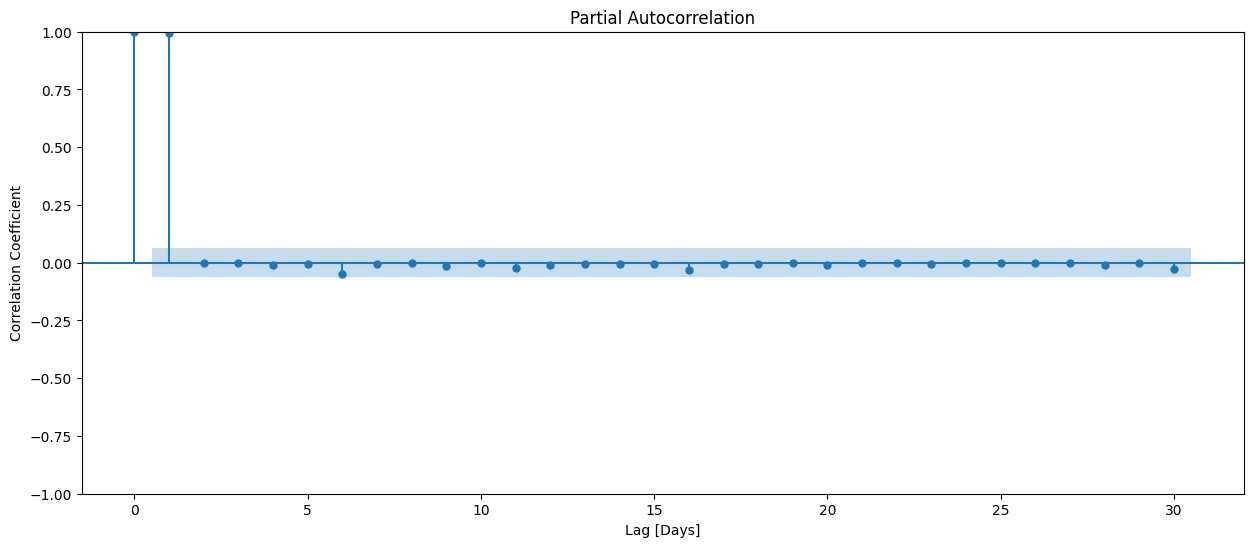

In [ ]:
fig, ax = plt.subplots(figsize=(15, 6))
plot_pacf(reiz_time_series,ax=ax)
plt.xlabel("Lag [Days]")
plt.ylabel("Correlation Coefficient");

<Axes: title={'center': 'REIZ Closing Price Times Series'}, xlabel='Time', ylabel='Closing Price'>

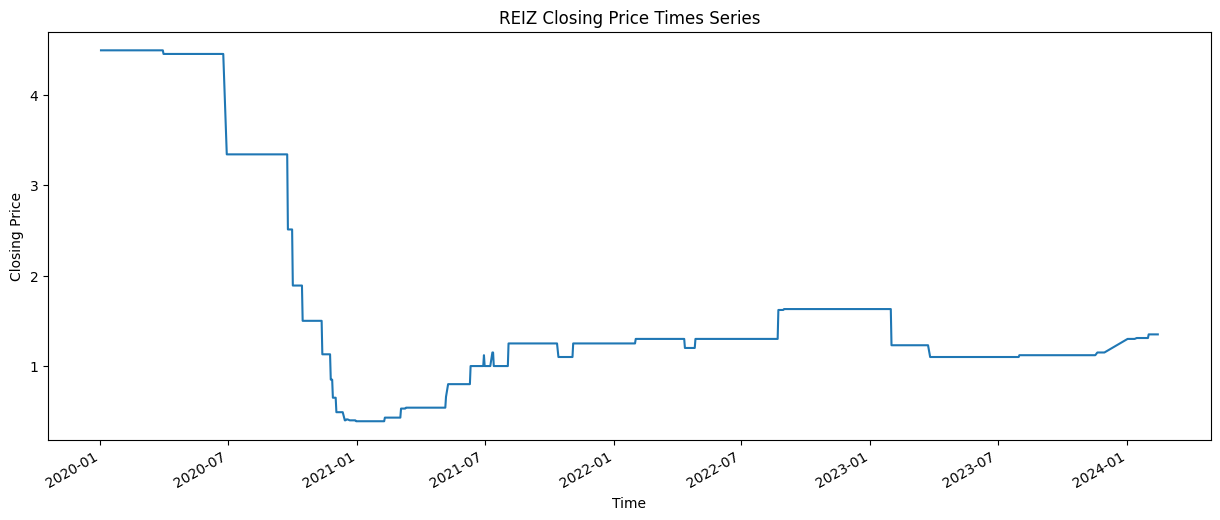

In [ ]:
fig, ax = plt.subplots(figsize=(15, 6))
reiz_time_series["ClosingPrice"].plot(xlabel="Time",ylabel="Closing Price",title="REIZ Closing Price Times Series",ax=ax)

<Axes: title={'center': 'REIZ Rolling Monthly Closing Price Times Series'}, xlabel='Time', ylabel='Closing Price'>

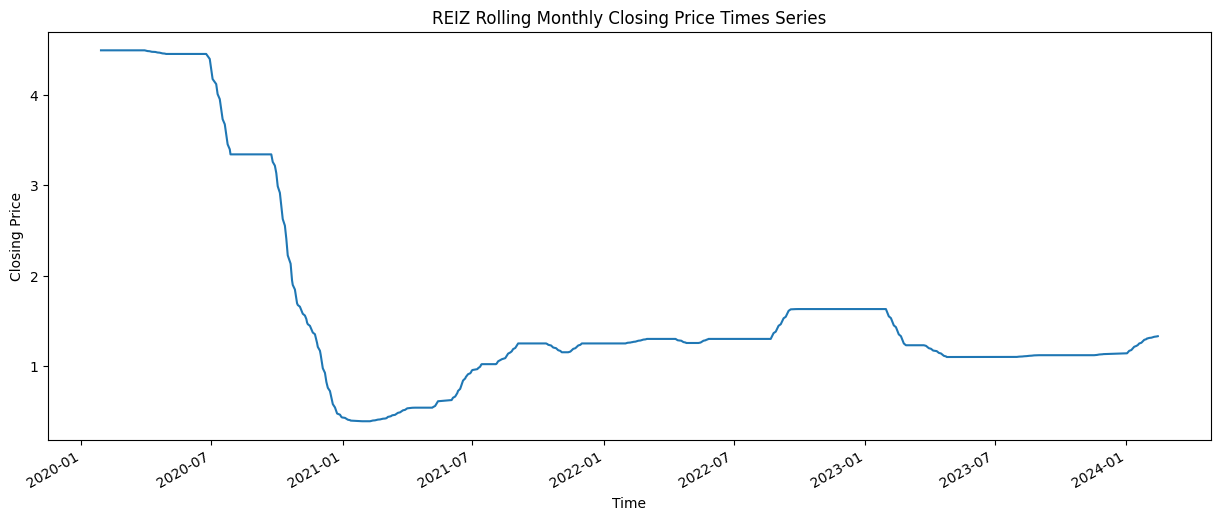

In [ ]:
fig, ax = plt.subplots(figsize=(15, 6))
reiz_time_series["ClosingPrice"].rolling(20).mean().plot(xlabel="Time",ylabel="Closing Price",title="REIZ Rolling Monthly Closing Price Times Series",ax=ax)

SCBL PLOTS

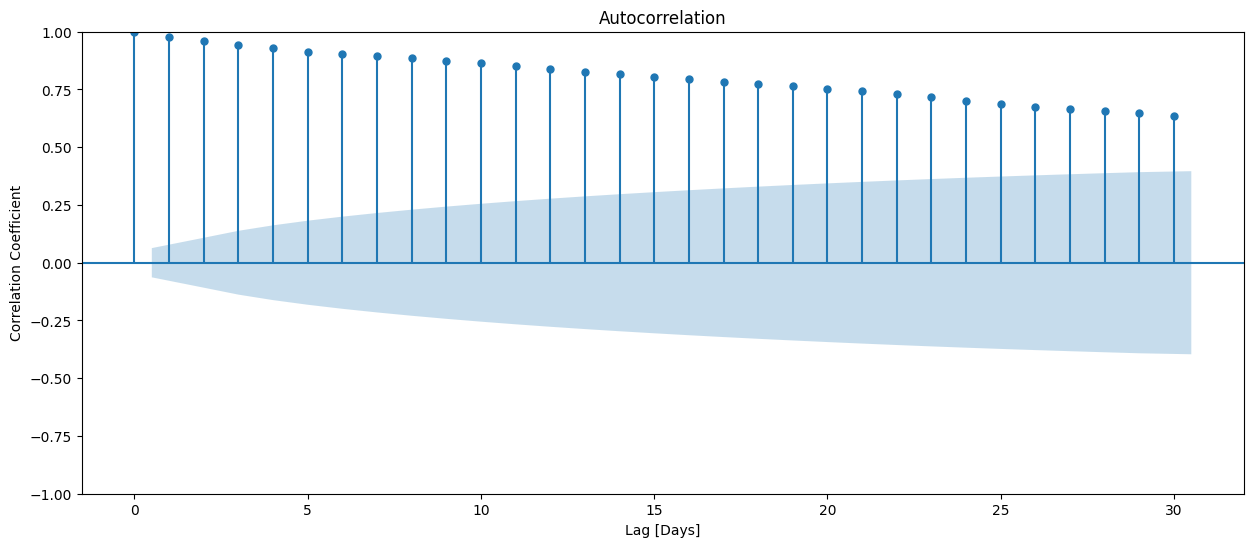

In [ ]:
fig, ax = plt.subplots(figsize=(15, 6))
plot_acf(scbl_time_series,ax=ax)
plt.xlabel("Lag [Days]")
plt.ylabel("Correlation Coefficient");

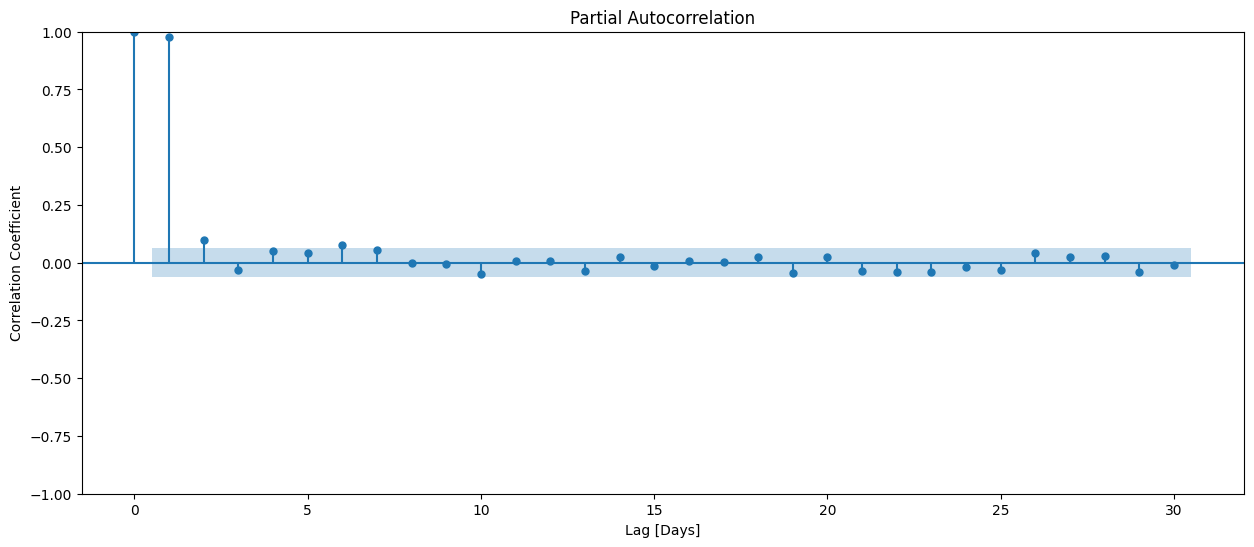

In [ ]:
fig, ax = plt.subplots(figsize=(15, 6))
plot_pacf(scbl_time_series,ax=ax)
plt.xlabel("Lag [Days]")
plt.ylabel("Correlation Coefficient");

<Axes: title={'center': 'SCBL Closing Price Times Series'}, xlabel='Time', ylabel='Closing Price'>

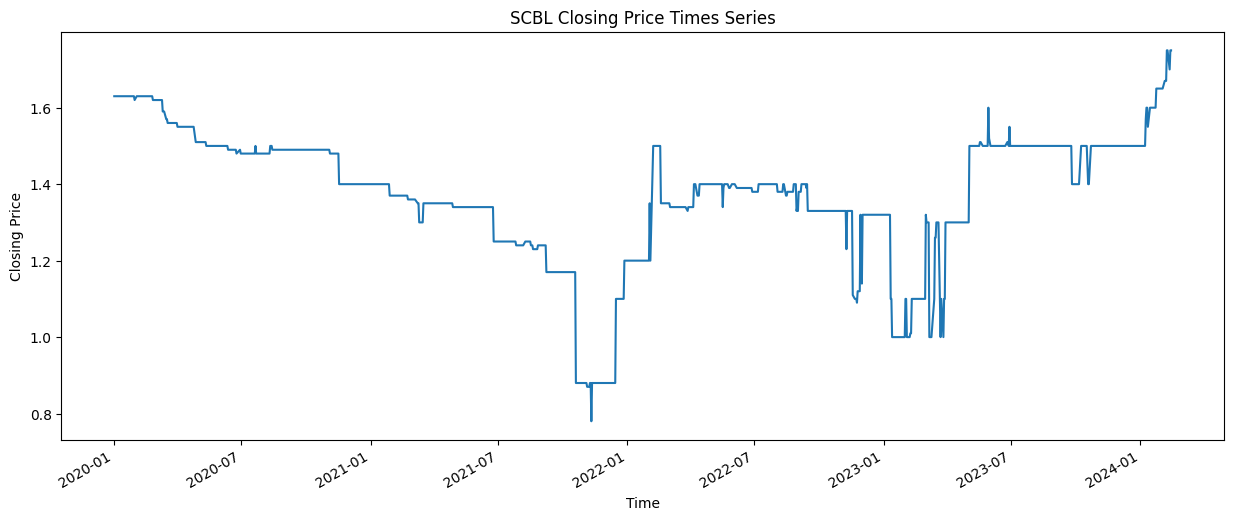

In [ ]:
fig, ax = plt.subplots(figsize=(15, 6))
scbl_time_series["ClosingPrice"].plot(xlabel="Time",ylabel="Closing Price",title="SCBL Closing Price Times Series",ax=ax)

<Axes: title={'center': 'SCBL Rolling Monthly Closing Price Times Series'}, xlabel='Time', ylabel='Closing Price'>

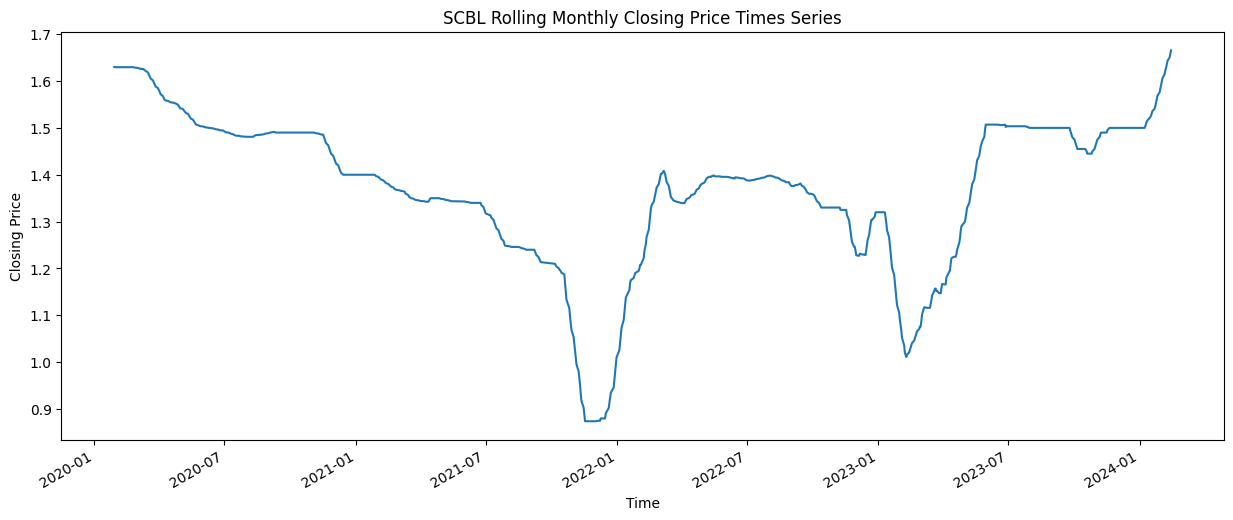

In [ ]:
fig, ax = plt.subplots(figsize=(15, 6))
scbl_time_series["ClosingPrice"].rolling(20).mean().plot(xlabel="Time",ylabel="Closing Price",title="SCBL Rolling Monthly Closing Price Times Series",ax=ax)

SHOP PLOTS

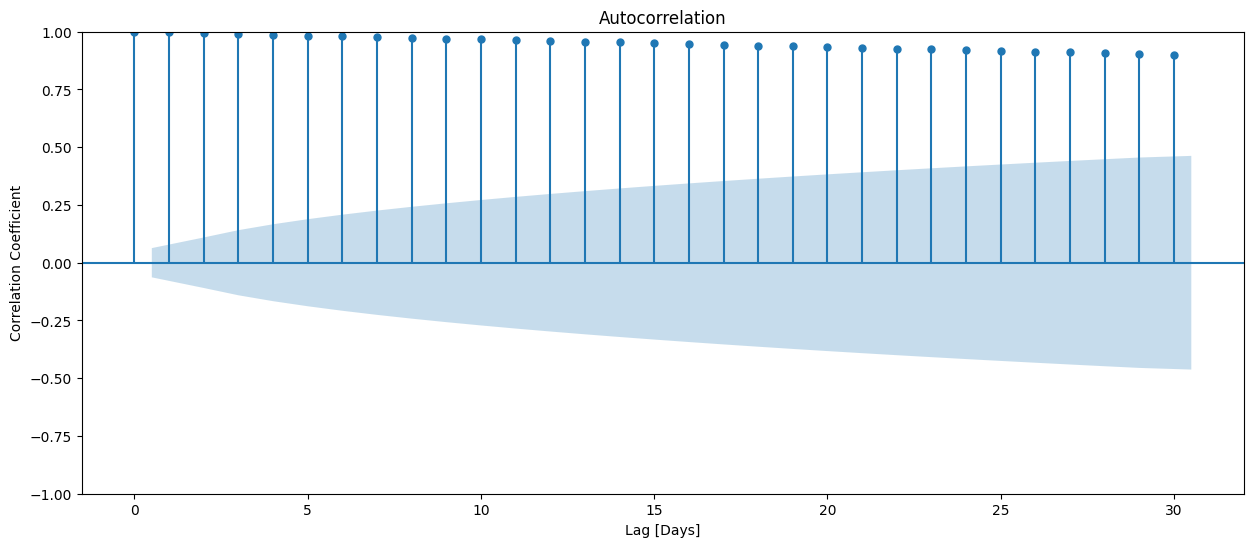

In [ ]:
fig, ax = plt.subplots(figsize=(15, 6))
plot_acf(shop_time_series,ax=ax)
plt.xlabel("Lag [Days]")
plt.ylabel("Correlation Coefficient");

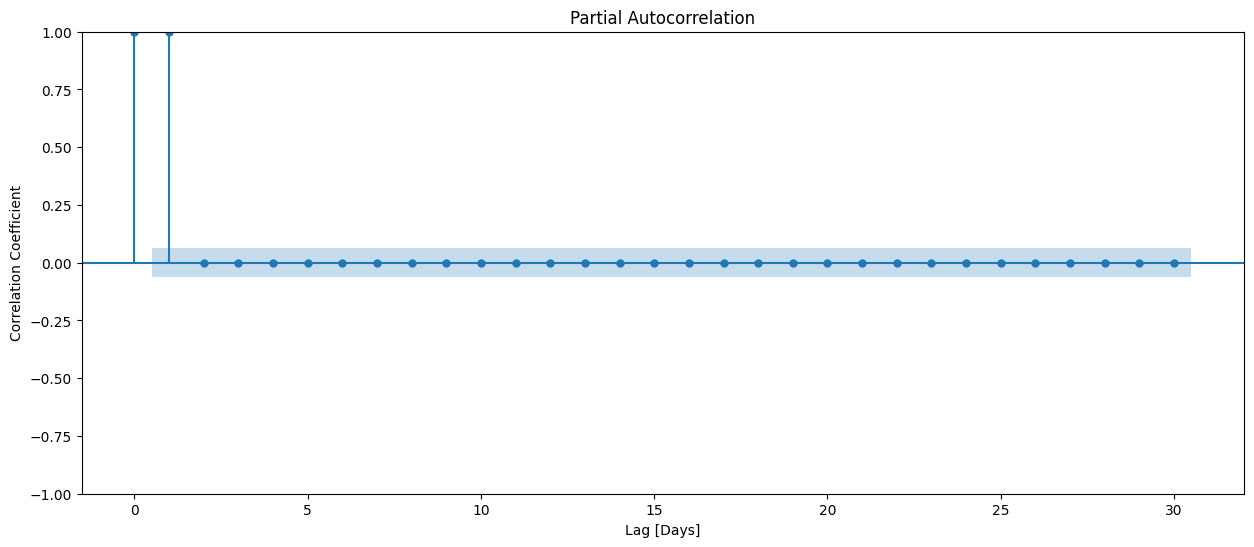

In [ ]:
fig, ax = plt.subplots(figsize=(15, 6))
plot_pacf(shop_time_series,ax=ax)
plt.xlabel("Lag [Days]")
plt.ylabel("Correlation Coefficient");

<Axes: title={'center': 'SHOP Closing Price Times Series'}, xlabel='Time', ylabel='Closing Price'>

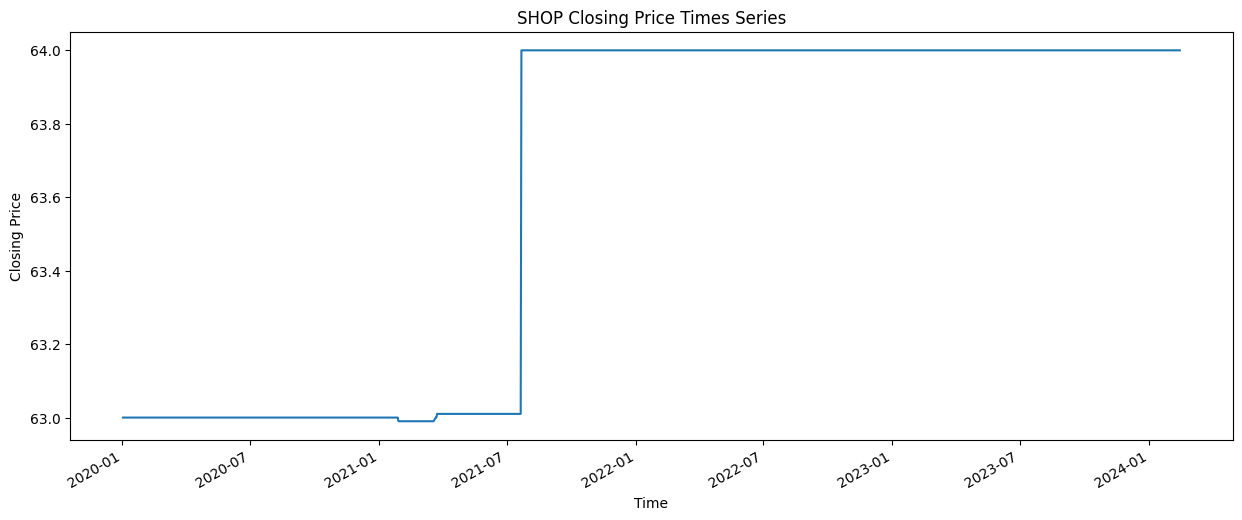

In [ ]:
fig, ax = plt.subplots(figsize=(15, 6))
shop_time_series["ClosingPrice"].plot(xlabel="Time",ylabel="Closing Price",title="SHOP Closing Price Times Series",ax=ax)

<Axes: title={'center': 'SHOP Rolling Monthly Closing Price Times Series'}, xlabel='Time', ylabel='Closing Price'>

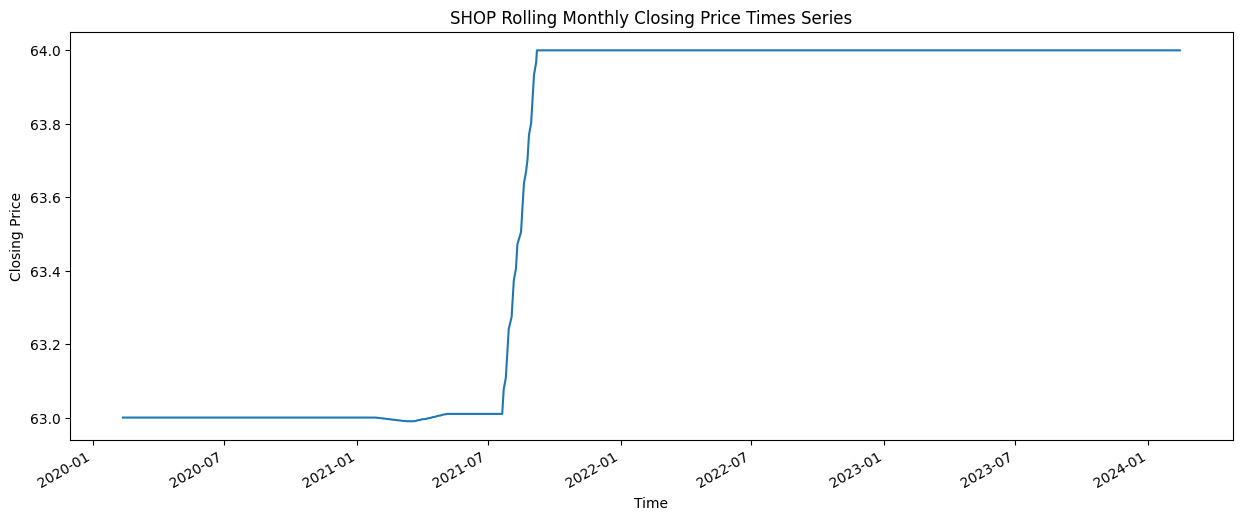

In [ ]:
fig, ax = plt.subplots(figsize=(15, 6))
shop_time_series["ClosingPrice"].rolling(30).mean().plot(xlabel="Time",ylabel="Closing Price",title="SHOP Rolling Monthly Closing Price Times Series",ax=ax)

STATIONARITY CHECK

In [ ]:
def adf_test(dataset):

    dftest = adfuller(dataset, autolag = 'AIC')
    print("1. ADF : ",dftest[0])
    print("2. P-Value : ", dftest[1])
    print("3. Num Of Lags : ", dftest[2])
    print("4. Num Of Observations Used For ADF Regression:",      dftest[3])
    print("5. Critical Values :")
    for key, val in dftest[4].items():
        print("\t",key, ": ", val)


In [ ]:
adf_test(atel_time_series['ClosingPrice'])

1. ADF :  -0.9693333568454048
2. P-Value :  0.764284320720627
3. Num Of Lags :  19
4. Num Of Observations Used For ADF Regression: 939
5. Critical Values :
	 1% :  -3.4373332444652944
	 5% :  -2.864622912101569
	 10% :  -2.568411524473161


In [ ]:
adf_test(cecz_time_series['ClosingPrice'])

1. ADF :  1.8212127085082264
2. P-Value :  0.9983901740691384
3. Num Of Lags :  1
4. Num Of Observations Used For ADF Regression: 957
5. Critical Values :
	 1% :  -3.4372015433243797
	 5% :  -2.8645648359053517
	 10% :  -2.568380590610461


In [ ]:
adf_test(reiz_time_series['ClosingPrice'])

1. ADF :  -2.4059216389636533
2. P-Value :  0.14007204056004685
3. Num Of Lags :  5
4. Num Of Observations Used For ADF Regression: 953
5. Critical Values :
	 1% :  -3.4372303791313144
	 5% :  -2.864577551835195
	 10% :  -2.568387363624452


In [ ]:
adf_test(scbl_time_series['ClosingPrice'])

1. ADF :  -1.7589258048175826
2. P-Value :  0.4010359920114184
3. Num Of Lags :  6
4. Num Of Observations Used For ADF Regression: 952
5. Critical Values :
	 1% :  -3.437237626048241
	 5% :  -2.8645807475403657
	 10% :  -2.56838906578808


In [ ]:
adf_test(shop_time_series['ClosingPrice'])

1. ADF :  -1.2550369342107193
2. P-Value :  0.649483911143705
3. Num Of Lags :  0
4. Num Of Observations Used For ADF Regression: 958
5. Critical Values :
	 1% :  -3.4371943720994165
	 5% :  -2.8645616735407002
	 10% :  -2.568378906211183


ATEL AUTO ARIMA ORDERING

In [ ]:
stepwise_fit = auto_arima(atel_time_series['ClosingPrice'], trace=True,
suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=inf, Time=0.53 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=1882.526, Time=0.06 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=1434.854, Time=0.06 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=1215.772, Time=0.11 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=1216.679, Time=0.17 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=1217.022, Time=0.20 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=1206.419, Time=0.26 sec
 ARIMA(1,2,3)(0,0,0)[0]             : AIC=1175.529, Time=0.45 sec
 ARIMA(0,2,3)(0,0,0)[0]             : AIC=inf, Time=0.28 sec
 ARIMA(2,2,3)(0,0,0)[0]             : AIC=1184.219, Time=1.40 sec
 ARIMA(1,2,4)(0,0,0)[0]             : AIC=inf, Time=2.09 sec
 ARIMA(0,2,4)(0,0,0)[0]             : AIC=1175.521, Time=0.46 sec
 ARIMA(0,2,5)(0,0,0)[0]             : AIC=1177.384, Time=0.55 sec
 ARIMA(1,2,5)(0,0,0)[0]             : AIC=inf, Time=1.21 sec
 ARIMA(0,2,4)(0,0,0)[0] intercept   : AIC=inf, Time=1

CECZ AUTO ARIMA ORDERING

In [ ]:
stepwise_fit = auto_arima(cecz_time_series['ClosingPrice'], trace=True,
suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=inf, Time=0.62 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-1916.710, Time=0.14 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=-2165.075, Time=0.04 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=inf, Time=0.17 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=-2282.831, Time=0.10 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=-2327.163, Time=0.08 sec
 ARIMA(4,2,0)(0,0,0)[0]             : AIC=-2371.634, Time=0.10 sec
 ARIMA(5,2,0)(0,0,0)[0]             : AIC=-2388.305, Time=0.28 sec
 ARIMA(5,2,1)(0,0,0)[0]             : AIC=inf, Time=1.21 sec
 ARIMA(4,2,1)(0,0,0)[0]             : AIC=inf, Time=0.96 sec
 ARIMA(5,2,0)(0,0,0)[0] intercept   : AIC=-2386.310, Time=0.66 sec

Best model:  ARIMA(5,2,0)(0,0,0)[0]          
Total fit time: 4.396 seconds


REIZ AUTO ARIMA ORDERING

In [ ]:
stepwise_fit = auto_arima(reiz_time_series['ClosingPrice'], trace=True,
suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=-2696.808, Time=0.46 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-2033.241, Time=0.06 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=-2301.374, Time=0.06 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=-2698.415, Time=0.18 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=-2697.059, Time=0.45 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=-2697.111, Time=0.60 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=inf, Time=1.32 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=-2696.447, Time=0.58 sec

Best model:  ARIMA(0,2,1)(0,0,0)[0]          
Total fit time: 3.724 seconds


SCBL AUTO ARIMA ORDERING

In [ ]:
stepwise_fit = auto_arima(scbl_time_series['ClosingPrice'], trace=True,
suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-3838.305, Time=1.16 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-3821.080, Time=0.15 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-3834.929, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-3833.738, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-3823.066, Time=0.06 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-3835.084, Time=0.96 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-3832.385, Time=0.66 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-3843.268, Time=1.52 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-3848.189, Time=1.08 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-3840.003, Time=0.39 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=-3846.768, Time=1.57 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-3834.829, Time=0.22 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=-3842.208, Time=0.57 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=-3844.126, Time=2.70 sec
 ARIMA(3,1,1)(0,0,0

SHOP AUTO ARIMA ORDERING

In [ ]:
stepwise_fit = auto_arima(scbl_time_series['ClosingPrice'], trace=True,
suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-3838.305, Time=1.08 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-3821.080, Time=0.14 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-3834.929, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-3833.738, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-3823.066, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-3835.084, Time=0.93 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-3832.385, Time=0.65 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-3843.268, Time=1.51 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-3848.189, Time=1.06 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-3840.003, Time=0.68 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=-3846.768, Time=2.18 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-3834.829, Time=0.25 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=-3842.208, Time=0.56 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=-3844.126, Time=1.69 sec
 ARIMA(3,1,1)(0,0,0

SPLIT DATA

In [ ]:
print(atel_time_series.shape)
train_atel=atel_time_series.iloc[:-30]
test_atel=atel_time_series.iloc[-30:]
print(train_atel.shape,test_atel.shape)
train_atel.head(40)

(959, 1)
(929, 1) (30, 1)


,ClosingPrice
timestamp,
2020-01-02,31.48
2020-01-03,31.48
2020-01-06,31.48
2020-01-07,31.48
2020-01-08,31.48
2020-01-09,31.48
2020-01-10,31.48
2020-01-13,31.48
2020-01-14,31.48


In [ ]:
print(cecz_time_series.shape)
train_cecz=cecz_time_series.iloc[:-30]
test_cecz=cecz_time_series.iloc[-30:]
print(train_cecz.shape,test_cecz.shape)
train_cecz.head(40)
train_cecz.info()

(959, 1)
(929, 1) (30, 1)
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 929 entries, 2020-01-02 to 2024-01-02
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ClosingPrice  929 non-null    float64
dtypes: float64(1)
memory usage: 14.5 KB


In [ ]:
print(reiz_time_series.shape)
train_reiz=reiz_time_series.iloc[:-30]
test_reiz=reiz_time_series.iloc[-30:]
print(train_reiz.shape,test_reiz.shape)

(959, 1)
(929, 1) (30, 1)


In [ ]:
print(scbl_time_series.shape)
train_scbl=scbl_time_series.iloc[:-30]
test_scbl=scbl_time_series.iloc[-30:]
print(train_scbl.shape,test_scbl.shape)

(959, 1)
(929, 1) (30, 1)


In [ ]:
print(shop_time_series.shape)
train_shop=shop_time_series.iloc[:-30]
test_shop=shop_time_series.iloc[-30:]
print(train_shop.shape,test_shop.shape)

(959, 1)
(929, 1) (30, 1)


In [ ]:
atel_time_series.describe()

,ClosingPrice
count,959.000000
mean,26.313629
std,8.206030
min,17.000000
25%,18.000000
50%,29.480000
75%,29.490000
max,43.670000


In [ ]:
cecz_time_series.describe()


,ClosingPrice
count,959.000000
mean,2.907456
std,1.943886
min,0.700000
25%,1.230000
50%,2.650000
75%,4.000000
max,7.660000


In [ ]:
reiz_time_series.describe()

,ClosingPrice
count,959.000000
mean,1.716809
std,1.203959
min,0.390000
25%,1.100000
50%,1.250000
75%,1.630000
max,4.490000


In [ ]:
scbl_time_series.describe()

,ClosingPrice
count,959.000000
mean,1.376517
std,0.173489
min,0.780000
25%,1.320000
50%,1.400000
75%,1.500000
max,1.750000


In [ ]:
shop_time_series.describe()

,ClosingPrice
count,959.000000
mean,63.614526
std,0.486618
min,62.990000
25%,63.000000
50%,64.000000
75%,64.000000
max,64.000000


TRAIN ATEL MODEL

In [ ]:
model=ARIMA(train_atel['ClosingPrice'],order=(0,2,4))
model_atel=model.fit()
model_atel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           ClosingPrice   No. Observations:                  929
Model:                 ARIMA(0, 2, 4)   Log Likelihood                -578.527
Date:                Sun, 28 Apr 2024   AIC                           1167.053
Time:                        21:57:58   BIC                           1191.213
Sample:                             0   HQIC                          1176.270
                                - 929                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.0029      0.337     -2.979      0.003      -1.663      -0.343
ma.L2          0.2401      0.338      0.710      0.478      -0.423       0.903
ma.L3         -0.2357      0.206     -1.142      0.254      -0.640       0.169
ma.L4          0.0108      0.205      0.052      0.958      -0.392       0.413
sigma2         0.2032      0.002     88.728      0.000       0.199       0.208
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):            965031.00
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):              30.72   Skew:                             5.53
Prob(H) (two-sided):                  0.00   Kurtosis:                       160.68
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

TRAIN CECZ MODEL

In [ ]:

model_cecz=ARIMA(train_cecz['ClosingPrice'],order=(5,2,0))
model_cecz=model_cecz.fit()
model_cecz.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           ClosingPrice   No. Observations:                  929
Model:                 ARIMA(5, 2, 0)   Log Likelihood                1160.818
Date:                Sun, 28 Apr 2024   AIC                          -2309.636
Time:                        21:57:58   BIC                          -2280.645
Sample:                             0   HQIC                         -2298.577
                                - 929                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7946      0.014    -55.610      0.000      -0.823      -0.767
ar.L2         -0.6343      0.018    -35.488      0.000      -0.669      -0.599
ar.L3         -0.4443      0.021    -21.641      0.000      -0.484      -0.404
ar.L4         -0.3192      0.019    -16.496      0.000      -0.357      -0.281
ar.L5         -0.1397      0.017     -8.074      0.000      -0.174      -0.106
sigma2         0.0048   3.71e-05    128.966      0.000       0.005       0.005
===================================================================================
Ljung-Box (L1) (Q):                   0.37   Jarque-Bera (JB):            241953.57
Prob(Q):                              0.54   Prob(JB):                         0.00
Heteroskedasticity (H):              14.62   Skew:                             6.07
Prob(H) (two-sided):                  0.00   Kurtosis:                        81.21
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

TRAIN REIZ MODEL

In [ ]:

model_reiz=ARIMA(train_reiz['ClosingPrice'],order=(0,2,1))
model_reiz=model_reiz.fit()
model_reiz.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           ClosingPrice   No. Observations:                  929
Model:                 ARIMA(0, 2, 1)   Log Likelihood                1294.271
Date:                Sun, 28 Apr 2024   AIC                          -2584.543
Time:                        21:57:59   BIC                          -2574.879
Sample:                             0   HQIC                         -2580.856
                                - 929                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9813      0.006   -159.336      0.000      -0.993      -0.969
sigma2         0.0036   1.74e-05    205.099      0.000       0.004       0.004
===================================================================================
Ljung-Box (L1) (Q):                   0.64   Jarque-Bera (JB):           1294114.62
Prob(Q):                              0.42   Prob(JB):                         0.00
Heteroskedasticity (H):               0.07   Skew:                           -11.37
Prob(H) (two-sided):                  0.00   Kurtosis:                       184.62
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

TRAIN SCBL MODEL

In [ ]:

model_scbl=ARIMA(train_scbl['ClosingPrice'],order=(3,1,1))
model_scbl=model_scbl.fit()
model_scbl.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           ClosingPrice   No. Observations:                  929
Model:                 ARIMA(3, 1, 1)   Log Likelihood                1867.673
Date:                Sun, 28 Apr 2024   AIC                          -3725.345
Time:                        21:57:59   BIC                          -3701.180
Sample:                             0   HQIC                         -3716.128
                                - 929                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5585      0.081      6.912      0.000       0.400       0.717
ar.L2          0.1209      0.021      5.794      0.000       0.080       0.162
ar.L3         -0.1384      0.015     -9.521      0.000      -0.167      -0.110
ma.L1         -0.6888      0.084     -8.215      0.000      -0.853      -0.524
sigma2         0.0010   1.31e-05     79.834      0.000       0.001       0.001
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):             45070.50
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):              34.28   Skew:                             0.09
Prob(H) (two-sided):                  0.00   Kurtosis:                        37.14
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

TRAIN SHOP MODEL

In [ ]:

model_shop=ARIMA(train_shop['ClosingPrice'],order=(0,1,0))
model_shop=model_shop.fit()
model_shop.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           ClosingPrice   No. Observations:                  929
Model:                 ARIMA(0, 1, 0)   Log Likelihood                1862.936
Date:                Sun, 28 Apr 2024   AIC                          -3723.873
Time:                        21:57:59   BIC                          -3719.040
Sample:                             0   HQIC                         -3722.029
                                - 929                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0011   2.28e-06    463.743      0.000       0.001       0.001
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):          33043806.80
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.00   Skew:                            30.40
Prob(H) (two-sided):                  0.00   Kurtosis:                       925.43
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

ATEL MODEL PREDICTIONS

<Axes: xlabel='timestamp'>

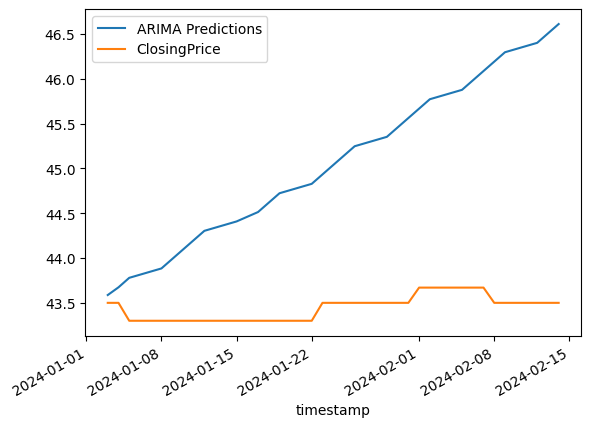

In [ ]:
start=len(train_atel)
end=len(train_atel)+len(test_atel)-1
pred_atel=model_atel.predict(start=start,end=end,typ='levels').set_axis(test_atel.index).rename('ARIMA Predictions')
pred_atel.plot(legend=True)
test_atel['ClosingPrice'].plot(legend=True)

CECZ MODEL PREDICTIONS

<Axes: xlabel='timestamp'>

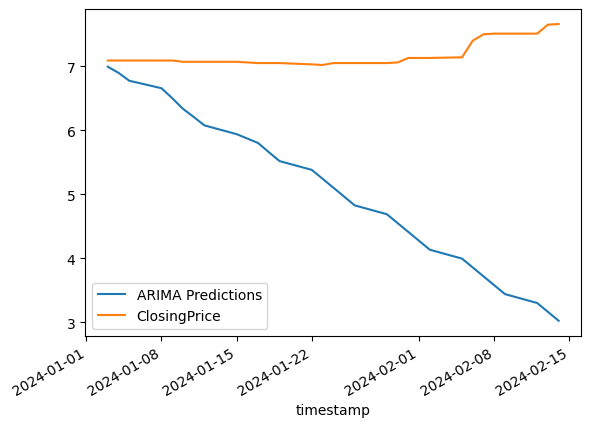

In [ ]:
start=len(train_cecz)
end=len(train_cecz)+len(test_cecz)-1
pred_cecz=(model_cecz.predict(start=start,end=end,typ='levels')).set_axis(test_cecz.index).rename('ARIMA Predictions')
pred_cecz.plot(legend=True)
test_cecz['ClosingPrice'].plot(legend=True)


REIZ MODEL PREDICTIONS

<Axes: xlabel='timestamp'>

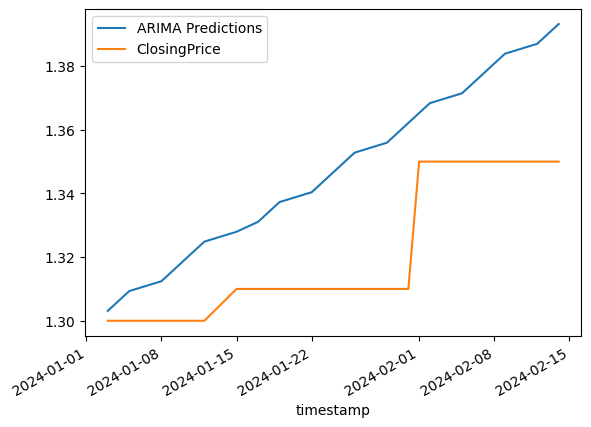

In [ ]:
start=len(train_reiz)
end=len(train_reiz)+len(test_reiz)-1
pred_reiz=model_reiz.predict(start=start,end=end,typ='levels').set_axis(test_reiz.index).rename('ARIMA Predictions')
pred_reiz.plot(legend=True)
test_reiz['ClosingPrice'].plot(legend=True)



SCBL MODEL PREDICTIONS

<Axes: xlabel='timestamp'>

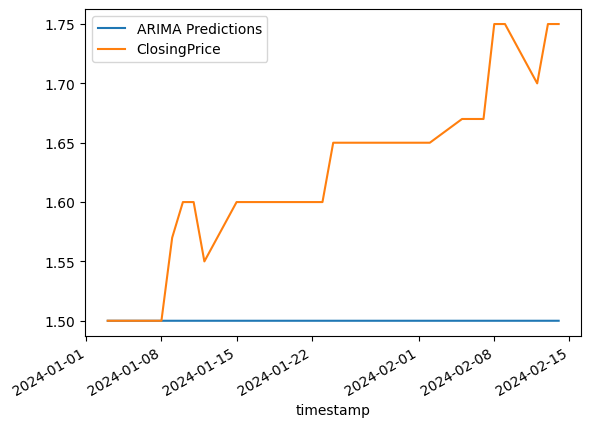

In [ ]:
start=len(train_scbl)
end=len(train_scbl)+len(test_scbl)-1
pred_scbl=model_scbl.predict(start=start,end=end,typ='levels').set_axis(test_scbl.index).rename('ARIMA Predictions')
pred_scbl.plot(legend=True)
test_scbl['ClosingPrice'].plot(legend=True)


SHOP MODEL PREDICTIONS

<Axes: xlabel='timestamp'>

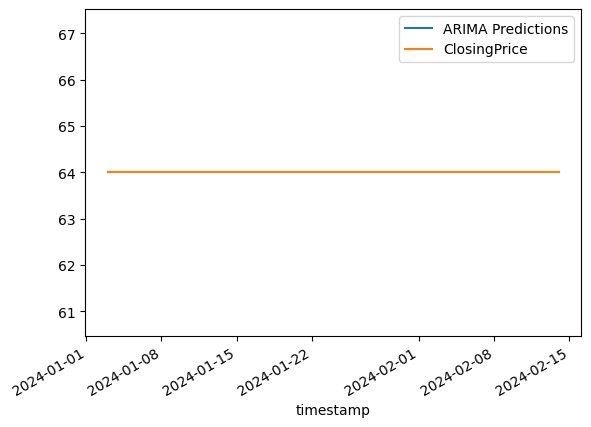

In [ ]:
start=len(train_shop)
end=len(train_shop)+len(test_shop)-1
pred_shop=model_shop.predict(start=start,end=end,typ='levels').set_axis(test_shop.index).rename('ARIMA Predictions')
pred_shop.plot(legend=True)
test_shop['ClosingPrice'].plot(legend=True)


ATEL MODEL EVALUATION

In [ ]:
y_pred_baseline = [(train_atel.mean())]*len(train_atel)
mae_baseline = mean_absolute_error(train_atel,y_pred_baseline)


print("Baseline MAE:", round(mae_baseline, 2))

Baseline MAE: 6.62


In [ ]:
test_atel['ClosingPrice'].mean()
rmse=sqrt(mean_squared_error(pred_atel,test_atel['ClosingPrice']))
mae=mean_absolute_error(pred_atel,test_atel['ClosingPrice'])
print(f"Test RMSE: {rmse}" ,f"Test MAE: {mae}" )

Test RMSE: 1.8321347340538414 Test MAE: 1.6360064318080794


CECZ MODEL EVALUATION

In [ ]:
y_pred_baseline = [(train_cecz.mean())]*len(train_cecz)
mae_baseline = mean_absolute_error(train_cecz,y_pred_baseline)


print("Baseline MAE:", round(mae_baseline, 2))

Baseline MAE: 1.54


In [ ]:
test_cecz['ClosingPrice'].mean()
rmse=sqrt(mean_squared_error(pred_cecz,test_cecz['ClosingPrice']))
mae=mean_absolute_error(pred_cecz,test_cecz['ClosingPrice'])
print(f"Test RMSE: {rmse}" ,f"Test MAE: {mae}" )

Test RMSE: 2.5396505474858038 Test MAE: 2.147769996844526


REIZ MODEL EVALUATION

In [ ]:
y_pred_baseline = [(train_reiz.mean())]*len(train_reiz)
mae_baseline = mean_absolute_error(train_reiz,y_pred_baseline)


print("Baseline MAE:", round(mae_baseline, 2))

Baseline MAE: 0.92


In [ ]:
test_reiz['ClosingPrice'].mean()
rmse=sqrt(mean_squared_error(pred_reiz,test_reiz['ClosingPrice']))
mae=mean_absolute_error(pred_reiz,test_reiz['ClosingPrice'])
print(f"Test RMSE: {rmse}" ,f"Test MAE: {mae}" )

Test RMSE: 0.030233007584807372 Test MAE: 0.0274858676452923


SCBL MODEL EVALUATION

In [ ]:
y_pred_baseline = [(train_scbl.mean())]*len(train_scbl)
mae_baseline = mean_absolute_error(train_scbl,y_pred_baseline)


print("Baseline MAE:", round(mae_baseline, 2))

Baseline MAE: 0.13


In [ ]:
test_scbl['ClosingPrice'].mean()
rmse=sqrt(mean_squared_error(pred_scbl,test_scbl['ClosingPrice']))
mae=mean_absolute_error(pred_scbl,test_scbl['ClosingPrice'])
print(f"Test RMSE: {rmse}" ,f"Test MAE: {mae}" )

Test RMSE: 0.14652759296112527 Test MAE: 0.12766794162327824


SHOP MODEL EVALUATION

In [ ]:
y_pred_baseline = [(train_shop.mean())]*len(train_shop)
mae_baseline = mean_absolute_error(train_shop,y_pred_baseline)


print("Baseline MAE:", round(mae_baseline, 2))

Baseline MAE: 0.48


In [ ]:
test_shop['ClosingPrice'].mean()
rmse=sqrt(mean_squared_error(pred_shop,test_shop['ClosingPrice']))
mae=mean_absolute_error(pred_shop,test_shop['ClosingPrice'])
print(f"Test RMSE: {rmse}" ,f"Test MAE: {mae}" )

Test RMSE: 0.0 Test MAE: 0.0


ATEL RESIDUAL PLOT

<Axes: xlabel='timestamp', ylabel='Residual Value'>

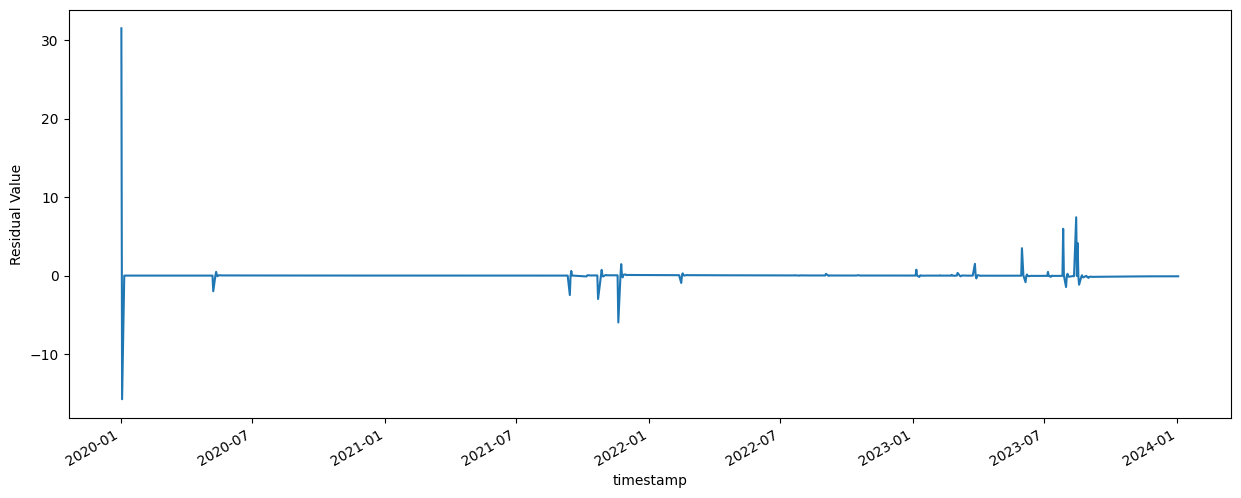

In [ ]:
train_atel_resid=model_atel.resid
fig, ax = plt.subplots(figsize=(15, 6))
train_atel_resid.plot(ylabel="Residual Value",ax=ax)

CECZ RESIDUAL PLOT

<Axes: xlabel='timestamp', ylabel='Residual Value'>

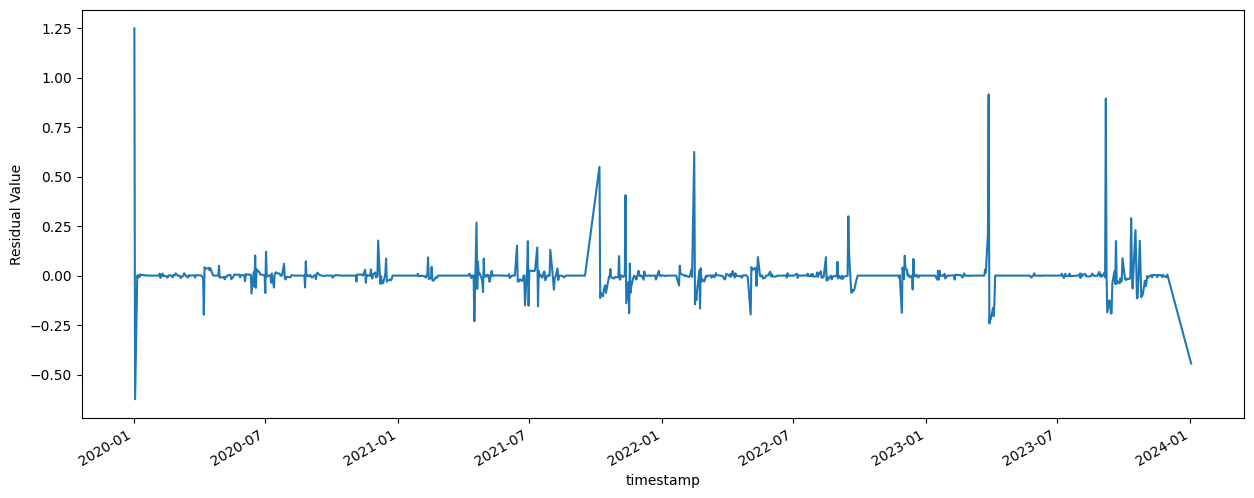

In [ ]:
train_cecz_resid=model_cecz.resid
fig, ax = plt.subplots(figsize=(15, 6))
train_cecz_resid.plot(ylabel="Residual Value",ax=ax)

REIZ RESIDUAL PLOT

<Axes: xlabel='timestamp', ylabel='Residual Value'>

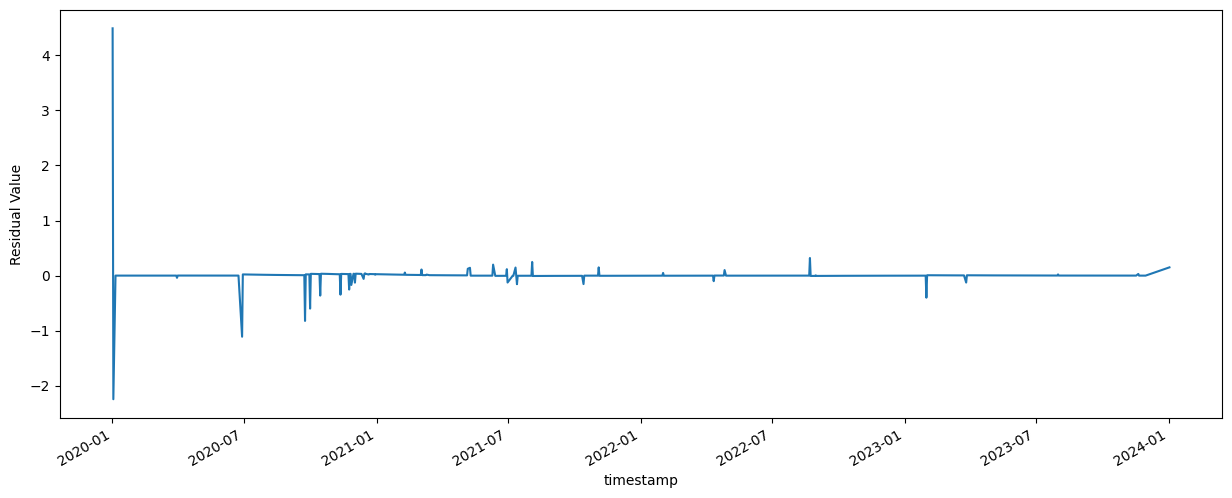

In [ ]:
train_reiz_resid=model_reiz.resid
fig, ax = plt.subplots(figsize=(15, 6))
train_reiz_resid.plot(ylabel="Residual Value",ax=ax)

SCBL RESIDUAL PLOT

<Axes: xlabel='timestamp', ylabel='Residual Value'>

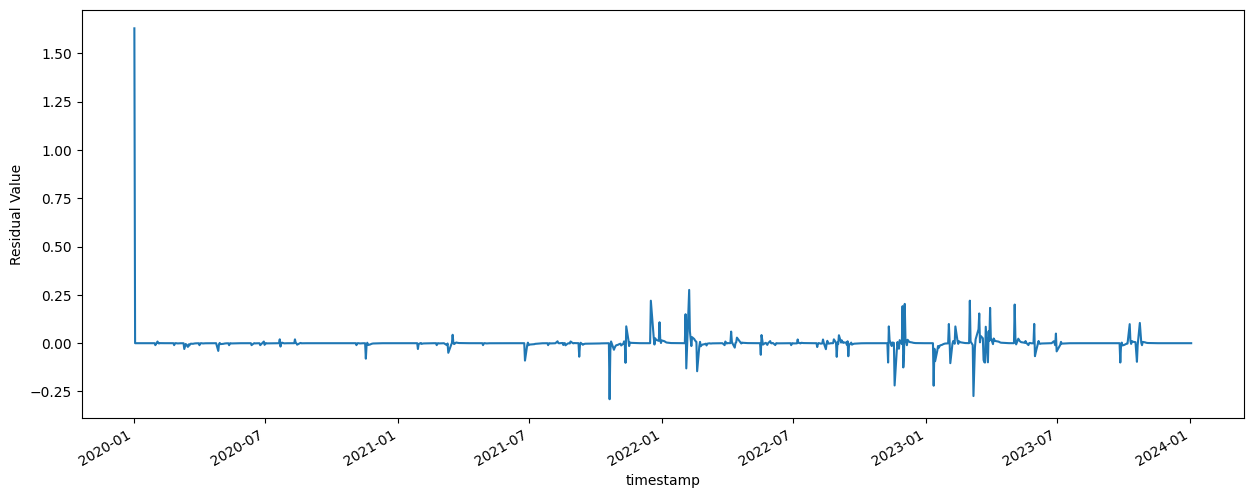

In [ ]:
train_scbl_resid=model_scbl.resid
fig, ax = plt.subplots(figsize=(15, 6))
train_scbl_resid.plot(ylabel="Residual Value",ax=ax)

SHOP RESIDUAL PLOT

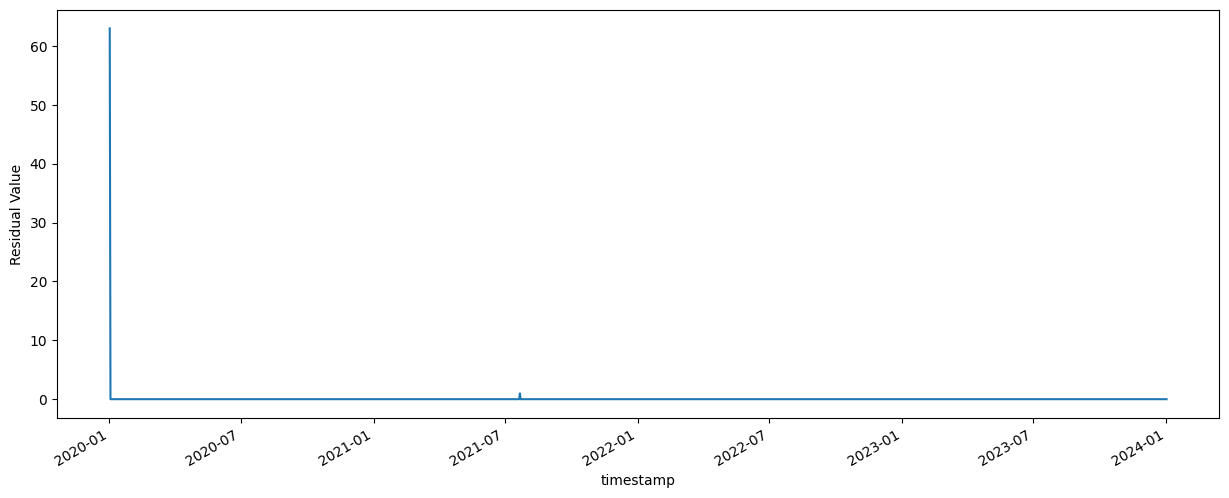

In [ ]:
train_shop_resid=model_shop.resid
fig, ax = plt.subplots(figsize=(15, 6))
train_shop_resid.plot(ylabel="Residual Value",ax=ax)
plt.savefig("train_shop_resid.png")